In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('zoo.csv')

In [5]:
data.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
target = data.class_type

In [13]:
target.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
print(np.unique(target.values))

[1 2 3 4 5 6 7]


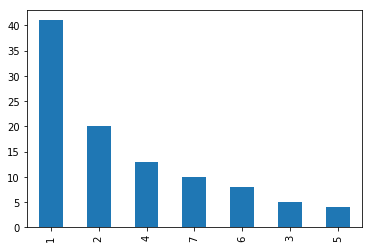

In [18]:
fig,ax = plt.subplots()
(target.value_counts()).plot(ax=ax,kind='bar')

In [19]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
feature = data.iloc[:,1:-1].values

In [24]:
feature.shape

(101, 16)

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [26]:
model = AgglomerativeClustering(n_clusters=7, linkage='average', affinity='cosine')

In [27]:
model.fit(feature)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=7, pooling_func='deprecated')

In [28]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [29]:
np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [31]:
target = target-1

In [32]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(target,model.labels_)

In [33]:
abs_error = np.sqrt(score)
print(abs_error)

2.4373333911071624
